# Electric Vehicle CAFV Classification

Step 1: Data analysis & Pre-processing

In [135]:
import pandas as pd

In [136]:
eleVehDf = pd.read_csv("Electric_Vehicle_Population_Data.csv")
print("Few rows")
print(eleVehDf.head())

Few rows
   VIN (1-10)     County          City State  Postal Code  Model Year  \
0  1C4JJXP66P     Kitsap       Poulsbo    WA      98370.0        2023   
1  1G1FX6S08K  Snohomish  Lake Stevens    WA      98258.0        2019   
2  WBY1Z2C58F       King       Seattle    WA      98116.0        2015   
3  5YJ3E1EBXK       King       Seattle    WA      98178.0        2019   
4  5YJSA1V24F     Yakima         Selah    WA      98942.0        2015   

        Make     Model                   Electric Vehicle Type  \
0       JEEP  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1  CHEVROLET   BOLT EV          Battery Electric Vehicle (BEV)   
2        BMW        I3          Battery Electric Vehicle (BEV)   
3      TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
4      TESLA   MODEL S          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range            21.0   
1           C

In [137]:
print("Summary of Statistics")
print(eleVehDf.describe())

Summary of Statistics
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  223992.000000  223995.000000   223977.000000  223977.000000   
mean    98176.491165    2021.264408       47.736187     829.894386   
std      2544.240509       2.989676       84.987140    7372.509049   
min      1731.000000    1999.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2022.000000        0.000000       0.000000   
75%     98374.000000    2023.000000       39.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         223521.000000    2.239950e+05       2.239920e+05  
mean              28.876361    2.329328e+08       5.297997e+10  
std               14.911023    6.884329e+07       1.531491e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.0

In [138]:
print("Data types of columns:")
print(eleVehDf.dtypes)

Data types of columns:
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2

In [139]:
print(eleVehDf.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [140]:
eleVehDf.dropna(inplace=True)
columns_to_remove = ['VIN (1-10)','State','Legislative District','DOL Vehicle ID','Vehicle Location','2020 Census Tract','Postal Code','Base MSRP']
eleVehDf = eleVehDf.drop(columns=columns_to_remove)
print(len(eleVehDf))

223496


In [141]:
string_columns = ['County', 'City', 'Make', 'Model', 'Electric Vehicle Type', 
                  'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']

for col in string_columns:
    eleVehDf[col] = eleVehDf[col].str.upper().str.strip()

In [142]:
numeric_columns = eleVehDf.select_dtypes(include=['int64', 'float64']).columns
unique_values = {col: eleVehDf[col].unique() for col in numeric_columns}
print(unique_values)

{'Model Year': array([2023, 2019, 2015, 2021, 2017, 2020, 2024, 2014, 2016, 2022, 2018,
       2025, 2013, 2011, 2012, 2010, 2008, 2000, 2002, 1999, 2003]), 'Electric Range': array([ 21., 238.,  81., 220., 208.,  25.,  15., 200., 259., 107.,   0.,
       149., 150., 210., 233.,  31.,  72.,  14., 215.,  35.,  30.,  87.,
       322.,  26., 270., 289.,  18., 291.,  73.,  37.,  84., 293.,  39.,
        33., 239., 308.,  75., 249.,  29.,  93.,  22., 266.,  23.,  53.,
        32.,  42., 265.,  10.,  16., 126.,  47.,  19.,   6., 151.,  34.,
       204.,  13.,  83.,  97.,  82.,  38., 234.,  41., 222.,  20.,  76.,
       330., 125.,  62.,  58., 258.,   8.,  17.,  60., 203., 153.,  12.,
       337., 245.,  40., 114., 170., 192., 124.,  28.,  68.,  24., 103.,
       111.,  59., 110.,  54.,  27., 218.,  48.,  56.,  55., 100., 288.,
        46.,  36.,  49.,   9.,  11.,  43.,  95.,  51.,  57.,  74.])}


In [143]:
eleVehDf = eleVehDf[eleVehDf['Model Year'] >= 2010]
eleVehDf = eleVehDf[eleVehDf['Electric Range'] != 0]


In [144]:
print(len(eleVehDf))

93263


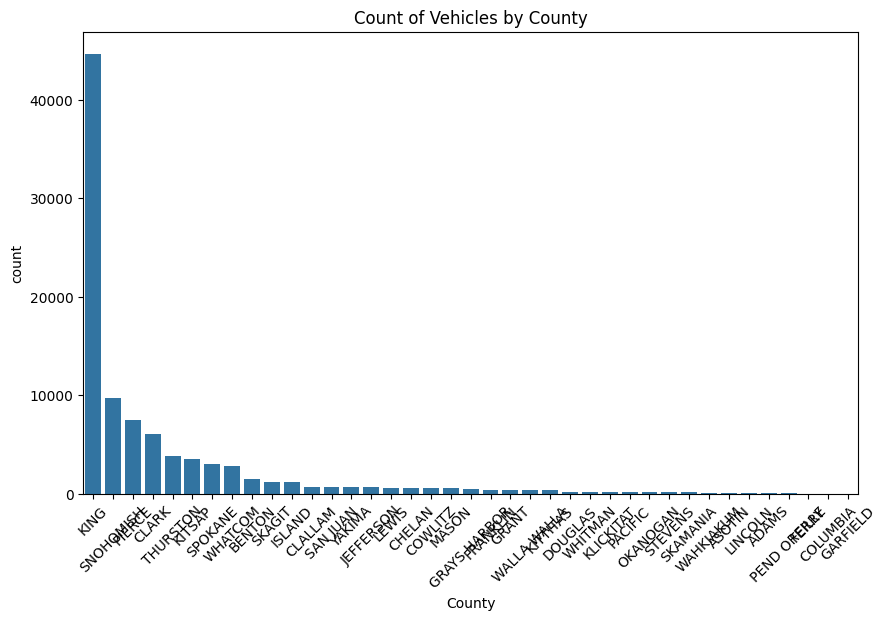

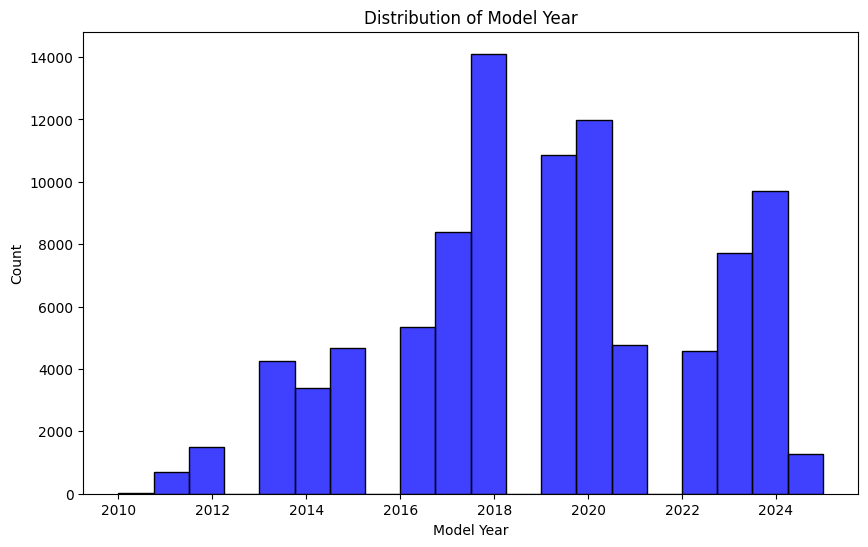

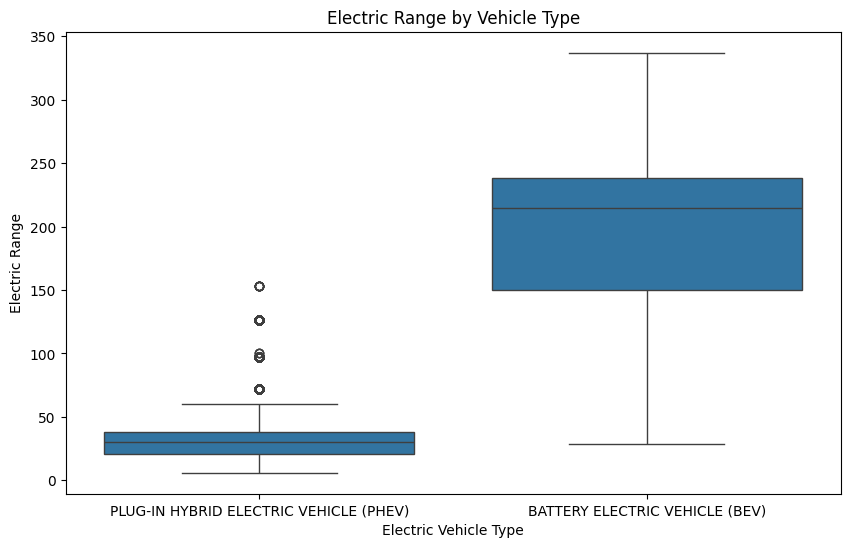

<Figure size 1000x600 with 0 Axes>

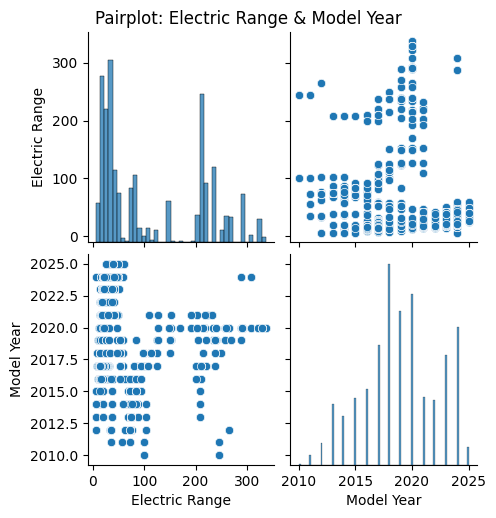

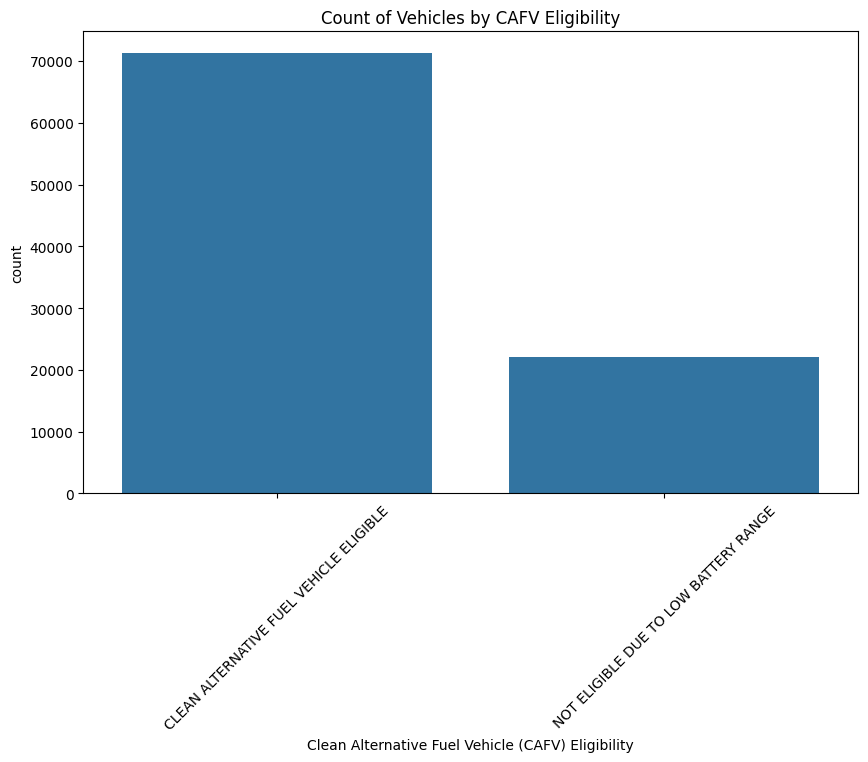

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=eleVehDf, x='County', order=eleVehDf['County'].value_counts().index)
plt.title('Count of Vehicles by County')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(eleVehDf['Model Year'], bins=20, kde=False, color='blue')
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=eleVehDf, x='Electric Vehicle Type', y='Electric Range')
plt.title('Electric Range by Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.show()

plt.figure(figsize=(10, 6))
sns.pairplot(eleVehDf[['Electric Range', 'Model Year']])
plt.suptitle('Pairplot: Electric Range & Model Year', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=eleVehDf, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
              order=eleVehDf['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index)
plt.title('Count of Vehicles by CAFV Eligibility')
plt.xticks(rotation=45)
plt.show()



                                                     County      City  \
County                                             1.000000 -0.175514   
City                                              -0.175514  1.000000   
Model Year                                        -0.029964  0.044629   
Make                                              -0.019466 -0.037143   
Model                                             -0.005719  0.005581   
Electric Vehicle Type                              0.000509  0.047499   
Clean Alternative Fuel Vehicle (CAFV) Eligibility  0.004902  0.021786   
Electric Range                                    -0.009173 -0.049091   
Electric Utility                                   0.129364 -0.230106   

                                                   Model Year      Make  \
County                                              -0.029964 -0.019466   
City                                                 0.044629 -0.037143   
Model Year                                  

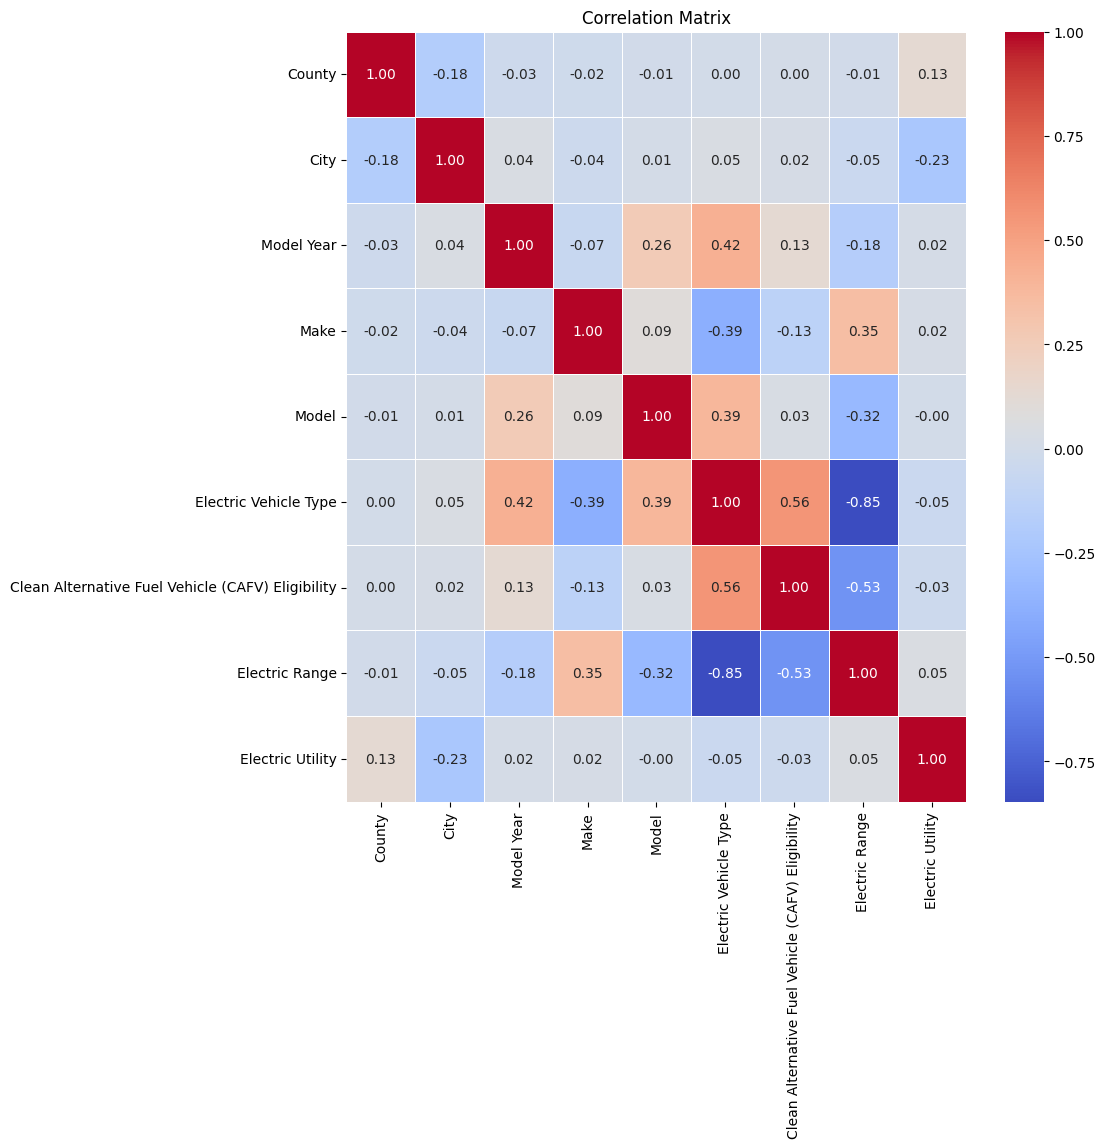

In [146]:
string_columns = eleVehDf.select_dtypes(include=['object']).columns
for col in string_columns:
    eleVehDf[col] = eleVehDf[col].astype('category').cat.codes
correlation_matrix = eleVehDf.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Target is : Clean Alternative Fuel Vehicle (CAFV) Eligibility <br>
On the basis of the correlation matrix the columns having low correlation which are dropped are:<br>
Electric Utility<br>
Model<br>
City<br>
County<br>

In [147]:

eleVehDf = eleVehDf.drop(columns=['Electric Utility', 'Model', 'City', 'County'])

9.Normalize

In [148]:
min_value= eleVehDf['Electric Range'].min()
max_value = eleVehDf['Electric Range'].max()
eleVehDf['Electric Range'] = (eleVehDf['Electric Range'] - min_value) / (max_value - min_value)


Final Statistics of Dataframe before applying to  machine learning algorithms  are:

In [149]:
print("Number of records:",len(eleVehDf))

Number of records: 93263


In [150]:
print("Columns and data types")
print(eleVehDf.dtypes)

Columns and data types
Model Year                                             int64
Make                                                    int8
Electric Vehicle Type                                   int8
Clean Alternative Fuel Vehicle (CAFV) Eligibility       int8
Electric Range                                       float64
dtype: object


In [151]:
print("Sample Records:")
print(eleVehDf.head())

Sample Records:
   Model Year  Make  Electric Vehicle Type  \
0        2023    15                      1   
1        2019     6                      0   
2        2015     4                      0   
3        2019    30                      0   
4        2015    30                      0   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  
0                                                  1        0.045317  
1                                                  0        0.700906  
2                                                  0        0.226586  
3                                                  0        0.646526  
4                                                  0        0.610272  


10.target Y and features 𝑿

Y = Clean Alternative Fuel Vehicle (CAFV) Eligibility<br>
X = Model Year, Make, Electric Vehicle Type, Electric Range  

11.Split the dataset into training, testing and validation sets.

In [152]:
from sklearn.model_selection import train_test_split
X = eleVehDf.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis=1)
Y = eleVehDf['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
X_trainVal, X_test, Y_trainVal, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_trainVal, Y_trainVal, test_size=0.2, random_state=42)


12.Print the shape of X_train, y_train, X_test, y_test, X_validation, y_validation

In [153]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", Y_test.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of y_validation:", Y_validation.shape)

Shape of X_train: (59688, 4)
Shape of y_train: (59688,)
Shape of X_test: (18653, 4)
Shape of y_test: (18653,)
Shape of X_validation: (14922, 4)
Shape of y_validation: (14922,)


Step 2: ML Models

In [154]:
print(eleVehDf['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique())

[1 0]


It is a binary classification task.

Logistic Regression<br>

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import time

start_time = time.time()

logregmodel = LogisticRegression(max_iter=2000)
logregmodel.fit(X_train, Y_train)
Y_pred_val_logregmodel = logregmodel.predict(X_validation)
logregmodel_validation_accuracy = accuracy_score(Y_validation, Y_pred_val_logregmodel)

Y_pred_test_logregmodel = logregmodel.predict(X_test)
logregmodel_test_accuracy = accuracy_score(Y_test, Y_pred_test_logregmodel)
Y_pred_prob_test_logregmodel = logregmodel.predict_proba(X_test)
logregmodel_test_loss = log_loss(Y_test, Y_pred_prob_test_logregmodel)

logregmodel_runtime = time.time() - start_time

print(f"Logistic Regression Validation Accuracy: {logregmodel_validation_accuracy:.8f}")
print(f"Logistic Regression Test Accuracy: {logregmodel_test_accuracy:.8f}")
print(f"Logistic Regression Test Loss: {logregmodel_test_loss:.4f}")
print(f"Logistic Regression Runtime: {logregmodel_runtime:.4f} seconds")

Logistic Regression Validation Accuracy: 0.99738641
Logistic Regression Test Accuracy: 0.99737308
Logistic Regression Test Loss: 0.0914
Logistic Regression Runtime: 0.0662 seconds


Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)
rfmodel.fit(X_train, Y_train)
Y_pred_val_rfmodel = rfmodel.predict(X_validation)
rfmodel_validation_accuracy = accuracy_score(Y_validation, Y_pred_val_rfmodel)

Y_pred_test_rfmodel = rfmodel.predict(X_test)
rfmodel_test_accuracy = accuracy_score(Y_test, Y_pred_test_rfmodel)
Y_pred_prob_test_rfmodel = rfmodel.predict_proba(X_test)
rfmodel_test_loss = log_loss(Y_test, Y_pred_prob_test_rfmodel)

rfmodel_runtime = time.time() - start_time

print(f"Random Forest Validation Accuracy: {rfmodel_validation_accuracy:.8f}")
print(f"Random Forest Test Accuracy: {rfmodel_test_accuracy:.8f}")
print(f"Random Forest Test Loss: {rfmodel_test_loss:.4f}")
print(f"Random Forest Runtime: {rfmodel_runtime:.4f} seconds")



Random Forest Validation Accuracy: 1.00000000
Random Forest Test Accuracy: 1.00000000
Random Forest Test Loss: 0.0000
Random Forest Runtime: 0.4819 seconds


Support Vector Machine

In [157]:
from sklearn.svm import SVC
from sklearn.metrics import  hinge_loss

start_time = time.time()

svmmodel = SVC(kernel='linear', random_state=42)
svmmodel.fit(X_train, Y_train)
Y_pred_val_svmmodel = svmmodel.predict(X_validation)
svmmodel_val_accuracy = accuracy_score(Y_validation, Y_pred_val_svmmodel)

Y_pred_test_svmmodel = svmmodel.predict(X_test)
svmmodel_test_accuracy = accuracy_score(Y_test, Y_pred_test_svmmodel)
Y_pred_prob_test_svmmodel = svmmodel.predict(X_test)
svmmodel_test_loss = hinge_loss(Y_test, Y_pred_test_svmmodel)

svmmodel_runtime = time.time() - start_time

print(f"SVM Validation Accuracy: {svmmodel_val_accuracy:.8f}")
print(f"SVM Test Accuracy: {svmmodel_test_accuracy:.8f}")
print(f"SVM Test Loss: {svmmodel_test_loss:.4f}")
print(f"SVM Runtime: {svmmodel_runtime:.4f} seconds")


SVM Validation Accuracy: 0.77449404
SVM Test Accuracy: 0.77837345
SVM Test Loss: 0.9901
SVM Runtime: 42.5687 seconds


Comparison of Accuracies

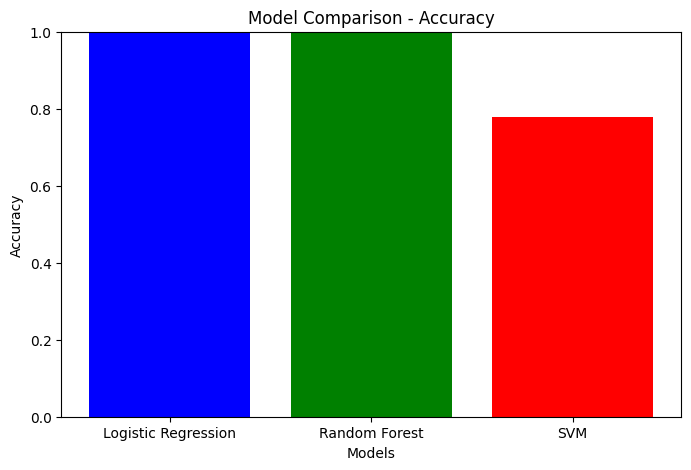

In [158]:


models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [logregmodel_test_accuracy, rfmodel_test_accuracy, svmmodel_test_accuracy]
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()



Comparison of Time

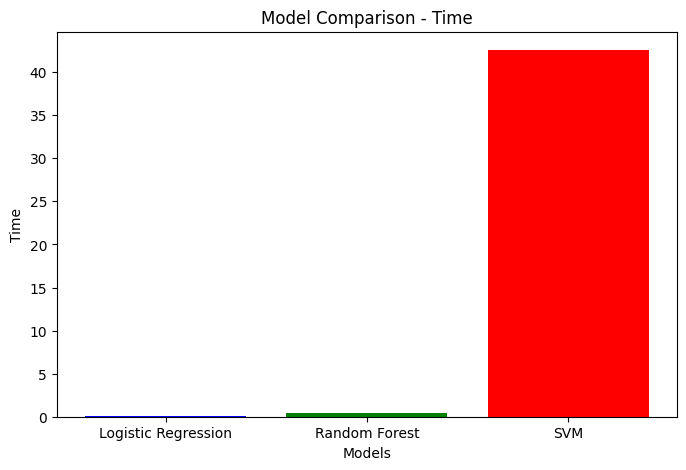

In [159]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
time = [logregmodel_runtime, rfmodel_runtime, svmmodel_runtime]
plt.figure(figsize=(8, 5))
plt.bar(models, time, color=['blue', 'green', 'red'])
plt.title('Model Comparison - Time')
plt.xlabel('Models')
plt.ylabel('Time')
plt.show()

Comparison of Loss

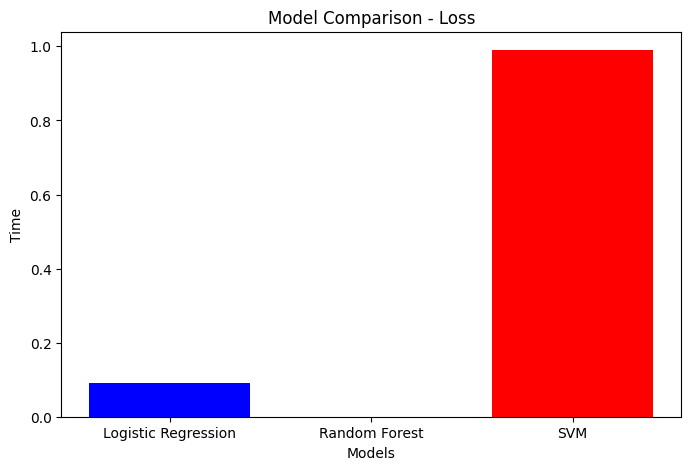

In [160]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
loss = [logregmodel_test_loss, rfmodel_test_loss, svmmodel_test_loss]
plt.figure(figsize=(8, 5))
plt.bar(models, loss, color=['blue', 'green', 'red'])
plt.title('Model Comparison - Loss')
plt.xlabel('Models')
plt.ylabel('Time')
plt.show()

Step 3:NN Model

Defining the neural  network

In [161]:
import torch
import torch.nn as nn
import torch.nn.functional as Func

class NNmodel(nn.Module):
    def __init__(self, input_dim):
        super(NNmodel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = Func.relu(self.fc1(x))
        x = Func.relu(self.fc2(x))
        x = Func.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

Converting data to tensors

In [162]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).view(-1, 1)

X_validation_tensor = torch.tensor(X_validation.values, dtype=torch.float32)
Y_validation_tensor = torch.tensor(Y_validation.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32).view(-1, 1)

Training the model

In [163]:
import torch.optim as optim
import time

def train_nnmodel(nnmodel, X_train, Y_train, X_validation, Y_validation, epochs=100):
    start_time = time.time()
    
    training_losses = []
    validation_accuracies = []    
    criterion = nn.BCELoss()
    optimizer = optim.SGD(nnmodel.parameters(), lr=0.01)
    
    for epoch in range(epochs):
        nnmodel.train()
        optimizer.zero_grad()
        outputs = nnmodel(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()
        training_losses.append(loss.item())

        nnmodel.eval()
        with torch.no_grad():
            val_outputs = nnmodel(X_validation)
            val_preds = (val_outputs > 0.5).float()
            accuracy = (val_preds == Y_validation).sum().item() / len(Y_validation)
            validation_accuracies.append(accuracy)
            print(f'Epoch [{epoch + 1}],Training Loss: {loss.item():.4f}, Validation Accuracy: {accuracy:.4f}')
    
    end_time = time.time()
    
    nnmodel_runtime = end_time - start_time
    return training_losses, validation_accuracies, nnmodel_runtime

In [164]:
input_dimensions = X_train.shape[1]
model = NNmodel(input_dim=input_dimensions)
training_losses, validation_accuracies, nnmodel_runtime = train_nnmodel(model, X_train_tensor, Y_train_tensor, X_validation_tensor, Y_validation_tensor)

Epoch [1],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [2],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [3],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [4],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [5],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [6],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [7],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [8],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [9],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [10],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [11],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [12],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [13],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [14],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [15],Training Loss: 16.8545, Validation Accuracy: 0.7644
Epoch [16],Training Loss: 16.8545, Validation Accuracy: 0.7644
E

Training and Validation Graphs

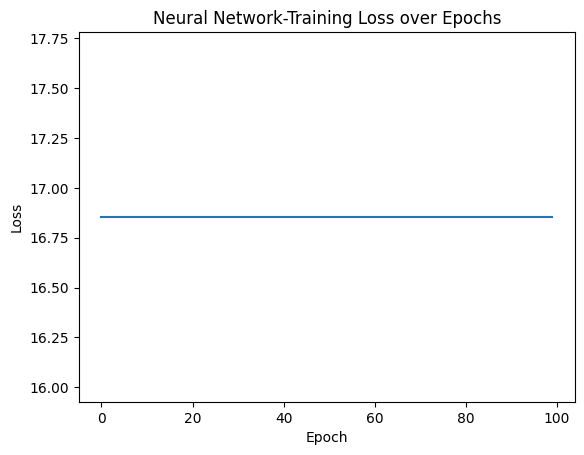

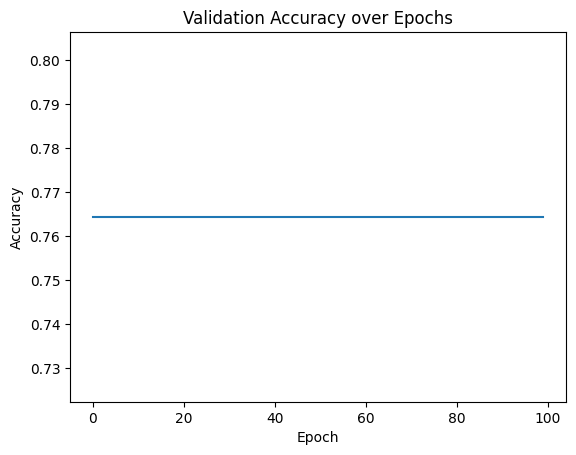

In [166]:
plt.plot(training_losses)
plt.title("Neural Network-Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(validation_accuracies)
plt.title("Validation Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Testing the model

In [167]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)

    nn_test_loss = nn.BCELoss()(test_outputs, Y_test_tensor)
    test_preds = (test_outputs > 0.5).float()
    nn_test_accuracy = (test_preds == Y_test_tensor).sum().item() / len(Y_test_tensor)

    print(f'Test Loss: {nn_test_loss.item():.4f}')
    print(f'Test Accuracy: {nn_test_accuracy:.8f}')
    print(f'Training Time: {nnmodel_runtime:.4f} seconds')


Test Loss: 16.3984
Test Accuracy: 0.76845548
Training Time: 1.4718 seconds


Comparison of Accuracy

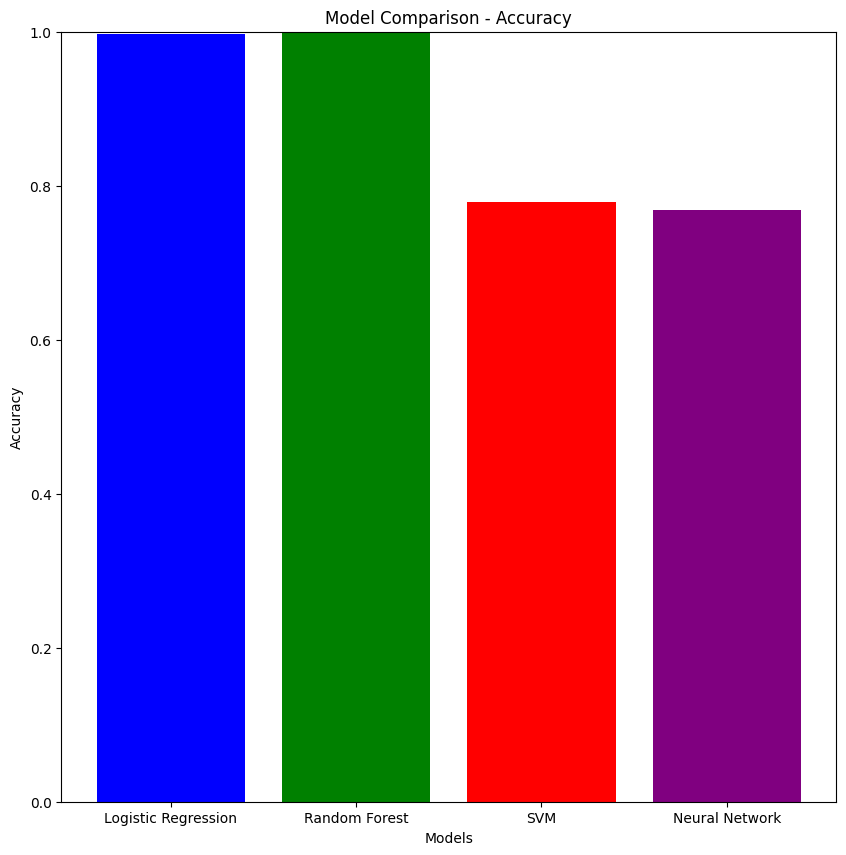

In [168]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Neural Network']
accuracies = [logregmodel_test_accuracy, rfmodel_test_accuracy, svmmodel_test_accuracy, nn_test_accuracy]

plt.figure(figsize=(10, 10))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Comparison of Time

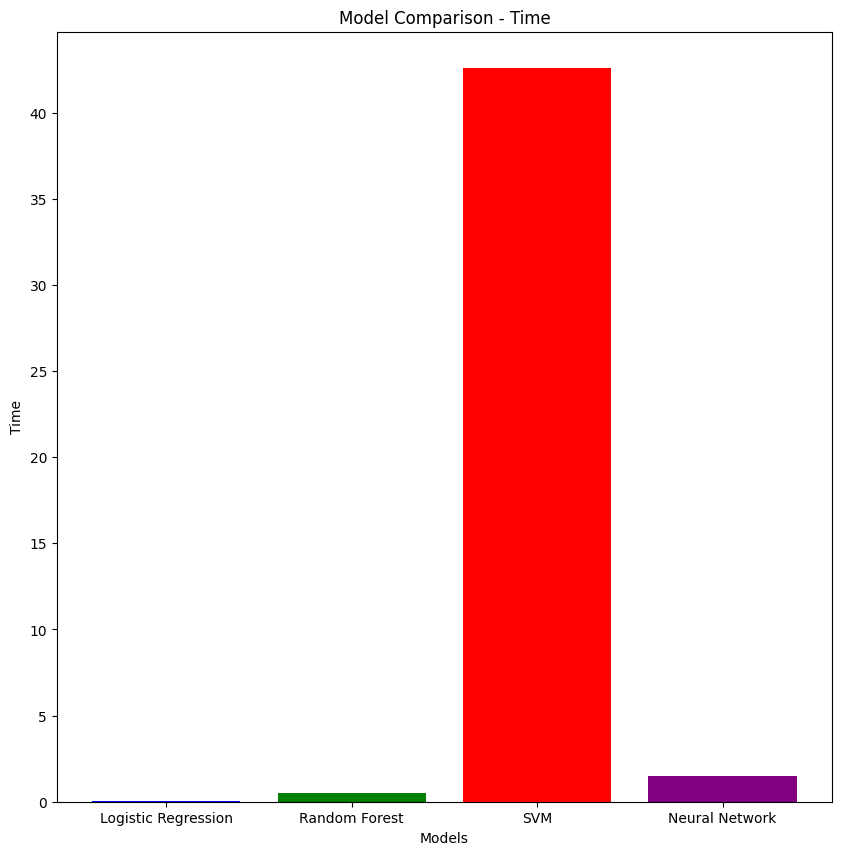

In [169]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Neural Network']
runtime = [logregmodel_runtime, rfmodel_runtime, svmmodel_runtime, nnmodel_runtime]

plt.figure(figsize=(10, 10))
plt.bar(models, runtime, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Comparison - Time')
plt.xlabel('Models')
plt.ylabel('Time')
plt.show()

Comparison of Loss

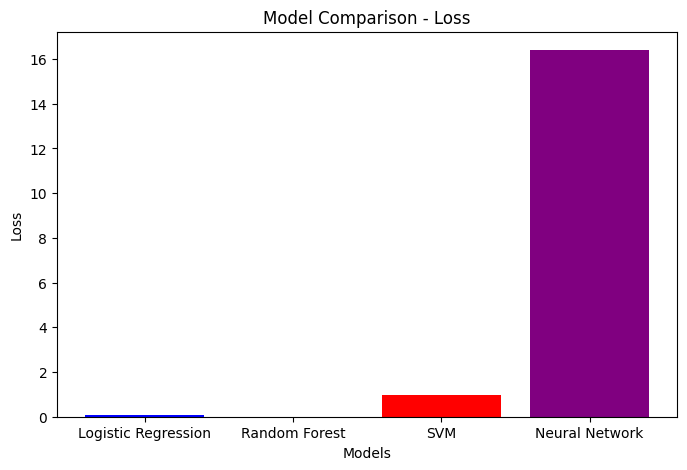

In [170]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Neural Network']
loss = [logregmodel_test_loss, rfmodel_test_loss, svmmodel_test_loss, nn_test_loss]

plt.figure(figsize=(8, 5))
plt.bar(models, loss, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Comparison - Loss')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()